In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def sobelOperator(img):
    sobelXY = np.zeros(img.shape)
    sobelX = np.zeros(img.shape)
    sobelY = np.zeros(img.shape)
    
    height, width = img.shape
    horizontalMask = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    verticalMask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    
    for i in range(height-2):
        for j in range(width-2):
            sobelX[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * horizontalMask))
            sobelY[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * verticalMask))
            sobelXY[i+1, j+1] = (sobelX[i+1, j+1] * sobelX[i+1,j+1] + \
                                 sobelY[i+1, j+1] * sobelY[i+1,j+1]) ** 0.5
    
    return sobelX, sobelY, sobelXY

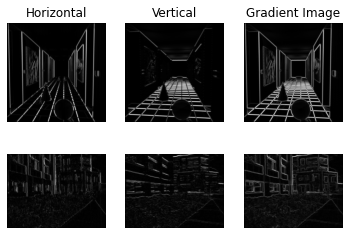

In [3]:
sx, sy, sxy = sobelOperator(cv.imread('corridorl.jpg',0))
ssx,ssy,ssxy = sobelOperator(cv.imread('triclopsi2l.jpg',0))

plt.subplot(2,3,1)
plt.title("Horizontal")
plt.imshow(sx,'gray')
plt.axis("off")
plt.subplot(2,3,2)
plt.title("Vertical")
plt.imshow(sy,'gray')
plt.axis("off")
plt.subplot(2,3,3)
plt.title("Gradient Image")
plt.imshow(sxy,'gray')
plt.axis("off")
plt.subplot(2,3,4)
plt.imshow(ssx,'gray')
plt.axis("off")
plt.subplot(2,3,5)
plt.imshow(ssy,'gray')
plt.axis("off")
plt.subplot(2,3,6)
plt.imshow(ssxy,'gray')
plt.axis("off")



plt.show()

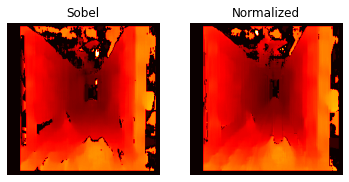

In [4]:
imgL = cv.imread('corridorl.jpg',0)
imgR = cv.imread('corridorr.jpg',0)
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
sobel = stereo.compute(imgL,imgR)
stereo.setPreFilterType(0)
normal = stereo.compute(imgL,imgR)

plt.subplot(1,2,1)
plt.title("Sobel")
plt.imshow(sobel,'hot')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Normalized")
plt.imshow(normal,'hot')
plt.axis("off")

plt.show()

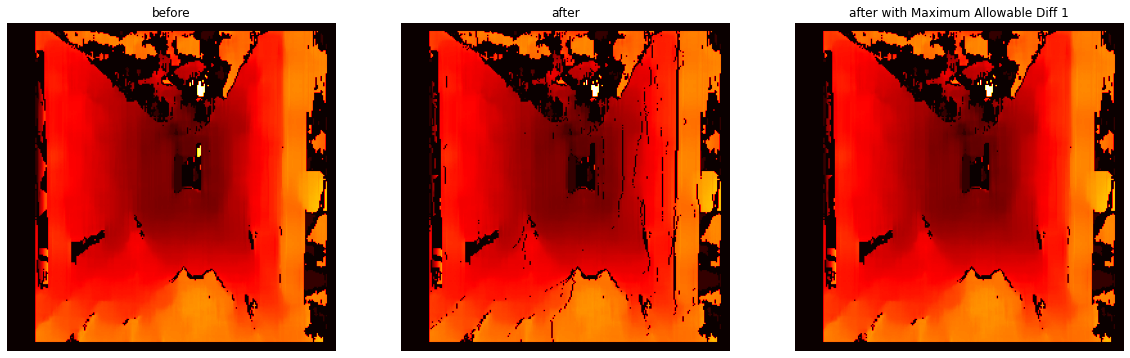

In [5]:
imgL = cv.imread('corridorl.jpg',0)
imgR = cv.imread('corridorr.jpg',0)

stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
before = stereo.compute(imgL,imgR)

stereo.setDisp12MaxDiff(0)
after = stereo.compute(imgL,imgR)

stereo.setDisp12MaxDiff(1)
after1 = stereo.compute(imgL,imgR)

plt.figure(figsize=(20,60))
plt.subplot(1,3,1)
plt.title("before")
plt.imshow(before,'hot')
plt.axis("off")
plt.subplot(1,3,2)
plt.title("after")
plt.imshow(after,'hot')
plt.axis("off")
plt.subplot(1,3,3)
plt.title("after with Maximum Allowable Diff 1")
plt.imshow(after1,'hot')
plt.axis("off")

plt.show()

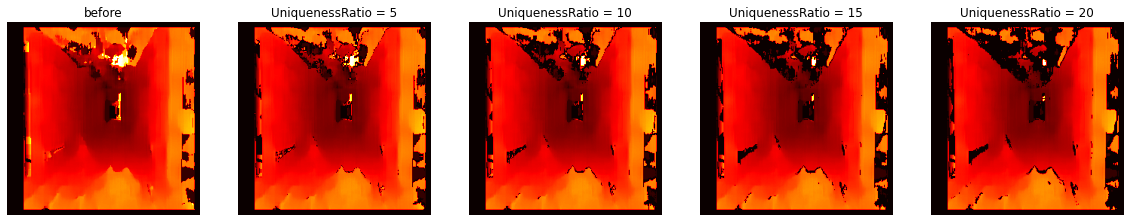

In [22]:
imgL = cv.imread('corridorl.jpg',0)
imgR = cv.imread('corridorr.jpg',0)

stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)

ur = [0,5,10,15,20]
title = ["before", "UniquenessRatio = 5", "UniquenessRatio = 10", "UniquenessRatio = 15", "UniquenessRatio = 20"]

plt.figure(figsize=(20,100))

for i in range(5):
    stereo.setUniquenessRatio(ur[i])
    test = stereo.compute(imgL,imgR)
    plt.subplot(1,5, i+1)
    plt.title(title[i])
    plt.imshow(test,'hot')
    plt.axis("off")
    
plt.show()



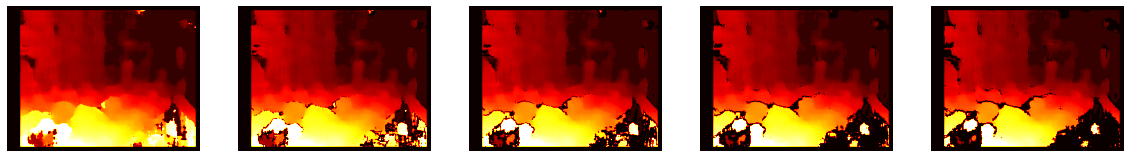

In [24]:
imgL = cv.imread('triclopsi2l.jpg',0)
imgR = cv.imread('triclopsi2r.jpg',0)

stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)

ur = [0,5,10,15,20]
title = ["before", "UniquenessRatio = 5", "UniquenessRatio = 10", "UniquenessRatio = 15", "UniquenessRatio = 20"]

plt.figure(figsize=(20,100))

for i in range(5):
    stereo.setUniquenessRatio(ur[i])
    test = stereo.compute(imgL,imgR)
    plt.subplot(1,5, i+1)
    #plt.title(title[i])
    plt.imshow(test,'hot')
    plt.axis("off")
    
plt.show()

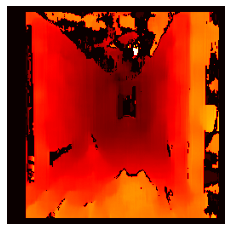

In [52]:
imgL = cv.imread('corridorl.jpg',0)
imgR = cv.imread('corridorr.jpg',0)

stereo1 = cv.StereoBM_create(numDisparities=16, blockSize=15)
stereo1.setPreFilterType(1)
stereo1.setDisp12MaxDiff(1)
stereo1.setUniquenessRatio(15)
result1 = stereo1.compute(imgL,imgR)

#plt.title("After Pre- & Post-Processing")
plt.imshow(result1,'hot')
plt.axis("off")

plt.show()

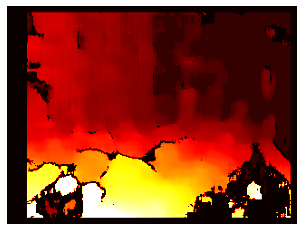

In [53]:
imgL = cv.imread('triclopsi2l.jpg',0)
imgR = cv.imread('triclopsi2r.jpg',0)

stereo2 = cv.StereoBM_create(numDisparities=16, blockSize=15)
stereo1.setPreFilterType(1)
stereo2.setDisp12MaxDiff(1)
stereo2.setUniquenessRatio(15)
result2 = stereo2.compute(imgL,imgR)

#plt.title("After Pre- & Post-Processing")
plt.imshow(result2,'hot')
plt.axis("off")

plt.show()